In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train_data=pd.read_csv(r'C:\ML\Gendersubmission\train.csv')
test_data=pd.read_csv(r'C:\ML\Gendersubmission\test.csv')
gender_submission=pd.read_csv(r'C:\ML\Gendersubmission\gender_submission.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\Sohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'passenger count')

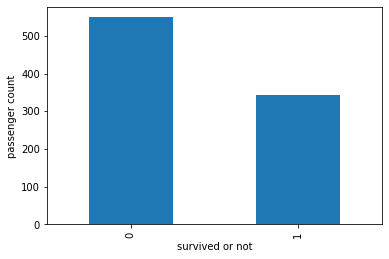

In [9]:
plt=train_data.Survived.value_counts().plot("bar")
plt.set_xlabel("survived or not")
plt.set_ylabel("passenger count")

C:\Users\Sohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'survival possibility')

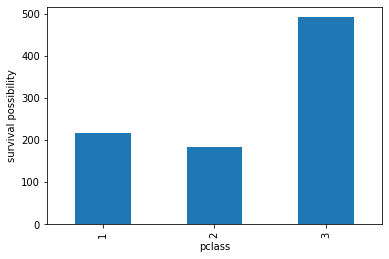

In [10]:
plt=train_data.Pclass.value_counts().sort_index().plot("bar", title="")
plt.set_xlabel("pclass")
plt.set_ylabel("survival possibility")

In [11]:
train_data[['Pclass','Survived']].groupby("Pclass").count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
train_data[['Pclass','Survived']].groupby("Pclass").sum()

,Survived
Pclass,
1,136
2,87
3,119


C:\Users\Sohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'survival possibility')

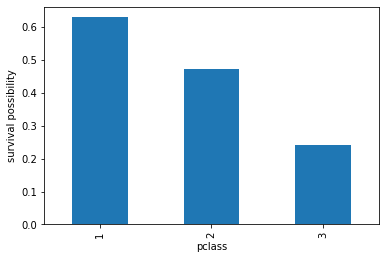

In [13]:
plt=train_data[['Pclass','Survived']].groupby("Pclass").mean().Survived.plot("bar")
plt.set_xlabel("pclass")
plt.set_ylabel("survival possibility")

C:\Users\Sohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Passenger count')

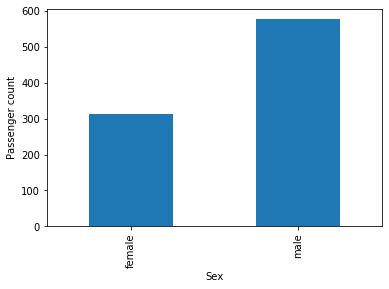

In [14]:
plt=train_data.Sex.value_counts().sort_index().plot("bar")
plt.set_xlabel("Sex")
plt.set_ylabel("Passenger count")

In [15]:
train_data[['Sex','Survived']].groupby("Sex").count()

,Survived
Sex,
female,314
male,577


In [16]:
train_data[['Sex','Survived']].groupby("Sex").sum()

,Survived
Sex,
female,233
male,109


C:\Users\Sohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'survival possibility')

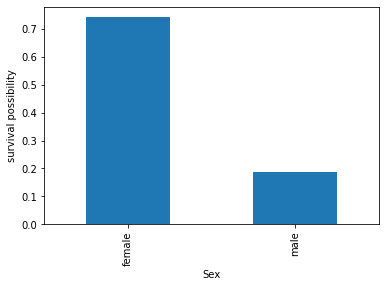

In [17]:
plt=train_data[['Sex','Survived']].groupby("Sex").mean().Survived.plot("bar")
plt.set_xlabel("Sex")
plt.set_ylabel("survival possibility")

C:\Users\Sohan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


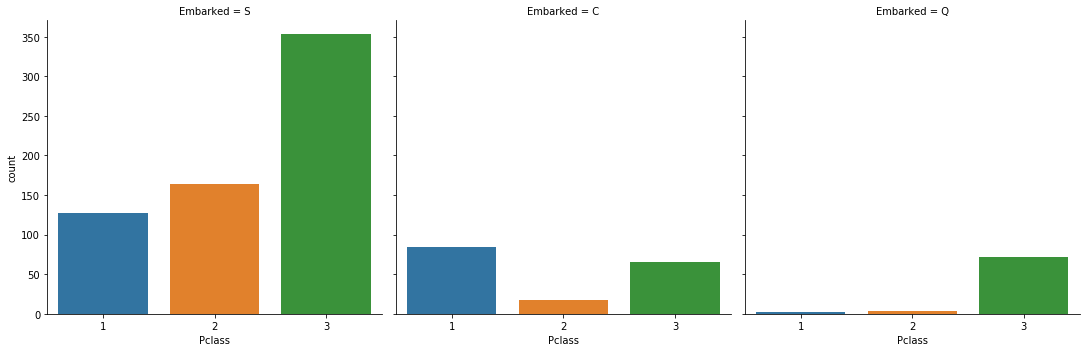

In [18]:
sns.factorplot('Pclass',col= 'Embarked',data= train_data,kind='count')

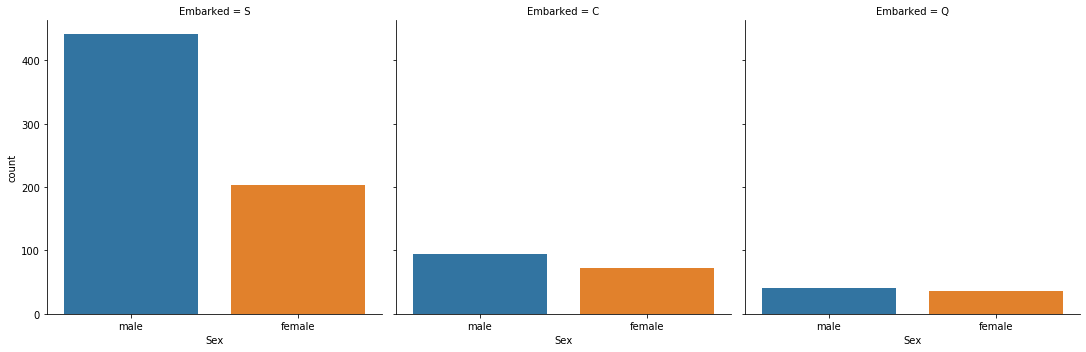

In [19]:
sns.factorplot('Sex',col= 'Embarked',data= train_data,kind='count')

In [20]:
train_data['FamilySize']=train_data['SibSp']+train_data["Parch"]+1

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [22]:
train_data=train_data.drop(columns=['Ticket','PassengerId','Cabin'])

In [23]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [24]:
train_data['Sex']=train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked']= train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [25]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


In [26]:
train_data['Title']= train_data.Name.str.extract('([A-Za-z]+)\.',expand=False)
train_data=train_data.drop(columns ='Name')

In [27]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,1,38.0,1,0,71.2833,0.0,2,Mrs
2,1,3,1,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,1,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,0,35.0,0,0,8.0500,2.0,1,Mr


In [28]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

In [29]:
train_data['Title']=train_data["Title"].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs':3, 'Others': 4})

In [30]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [31]:
corr_matrix=train_data.corr()

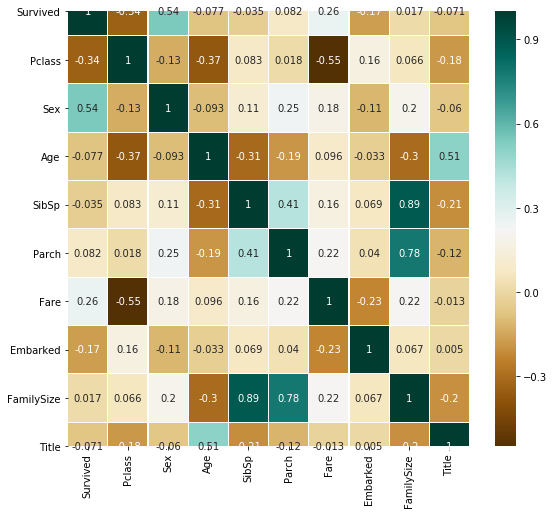

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(data=corr_matrix, cmap='BrBG', annot=True, linewidths=0.2)

In [33]:
train_data['Embarked']=train_data['Embarked'].fillna(2)

In [34]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [35]:
age_median_train=train_data.Age.median()
train_data.Age=train_data.Age.fillna(age_median_train)
print(age_median_train)

28.0


In [36]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [37]:
from sklearn.utils import shuffle
train_data=shuffle(train_data)

In [38]:
x_train=train_data.drop(columns='Survived')
y_train=train_data.Survived
y_train=pd.DataFrame({'Survived': y_train.values})

In [39]:
x_train.shape

(891, 9)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
x_training, x_valid, y_training, y_valid= train_test_split(x_train, y_train, test_size=0.2)

In [42]:
logreg_clf=LogisticRegression()
logreg_clf.fit(x_training, y_training)

C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
prediction=logreg_clf.predict(x_valid)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_valid,prediction)

0.7932960893854749

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion=confusion_matrix(y_valid,prediction,labels=[1,0])
print(confusion)

[[49 23]
 [14 93]]


In [48]:
from sklearn.metrics import classification_report
report=classification_report(y_valid,prediction)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       107
           1       0.78      0.68      0.73        72

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [49]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [52]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
test_data['FamilySize']=test_data['SibSp']+test_data["Parch"]+1

In [54]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [55]:
test_data['Sex']=test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked']=test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [56]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2,3


In [57]:
test_data['Title']=test_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
test_data=test_data.drop(columns='Name')

In [58]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,1,1,Mr
1,893,3,1,47.0,1,0,363272,7.0000,NaN,2,2,Mrs
2,894,2,0,62.0,0,0,240276,9.6875,NaN,1,1,Mr
3,895,3,0,27.0,0,0,315154,8.6625,NaN,2,1,Mr
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,2,3,Mrs


In [59]:
test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')

In [60]:
test_data['Title']= test_data['Title'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Others': 4})

In [61]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,1,1,2.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,2,2,3.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,1,1,2.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,2,1,2.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,2,3,3.0


In [62]:
corr_matrix=test_data.corr()

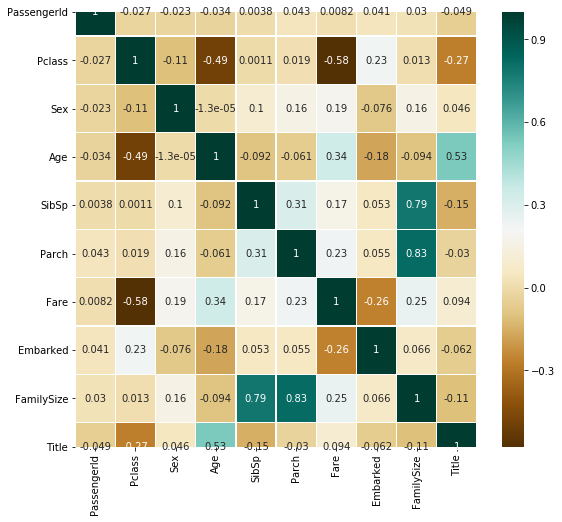

In [63]:
plt.figure(figsize=(9,8))
sns.heatmap(data=corr_matrix, cmap='BrBG', annot=True, linewidths=0.2)

In [64]:
test_data['Fare']=test_data['Fare'].fillna(1)

In [65]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,1,1,2.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,2,2,3.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,1,1,2.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,2,1,2.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,2,3,3.0


In [66]:
age_median_test=test_data.Age.median()
test_data.Age=test_data.Age.fillna(age_median_test)
print(age_median_test)

27.0


In [67]:
test_data=test_data.drop(columns=['Ticket','PassengerId','Cabin'])

In [68]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,34.5,0,0,7.8292,1,1,2.0
1,3,1,47.0,1,0,7.0000,2,2,3.0
2,2,0,62.0,0,0,9.6875,1,1,2.0
3,3,0,27.0,0,0,8.6625,2,1,2.0
4,3,1,22.0,1,1,12.2875,2,3,3.0


In [69]:
print(test_data.isnull().sum())

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         1
dtype: int64


In [70]:
test_data['Title']=test_data['Title'].fillna(1)

In [71]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,34.5,0,0,7.8292,1,1,2.0
1,3,1,47.0,1,0,7.0000,2,2,3.0
2,2,0,62.0,0,0,9.6875,1,1,2.0
3,3,0,27.0,0,0,8.6625,2,1,2.0
4,3,1,22.0,1,1,12.2875,2,3,3.0


In [72]:
print(test_data.isnull().sum())

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64


In [73]:
gender_submission['prediction']=logreg_clf.predict(test_data)

In [74]:
print(gender_submission['Survived'].dtype)

int64


In [75]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,34.5,0,0,7.8292,1,1,2.0
1,3,1,47.0,1,0,7.0000,2,2,3.0
2,2,0,62.0,0,0,9.6875,1,1,2.0
3,3,0,27.0,0,0,8.6625,2,1,2.0
4,3,1,22.0,1,1,12.2875,2,3,3.0


In [76]:
print('Accuracy Score=', accuracy_score(gender_submission['Survived'],gender_submission['prediction']))

Accuracy Score= 0.9569377990430622


In [77]:
confusion1=confusion_matrix(gender_submission['Survived'],gender_submission['prediction'],labels=[1,0])

In [78]:
print('Confusion Matrix:',confusion1)

Confusion Matrix: [[144   8]
 [ 10 256]]


In [79]:
report1=classification_report(gender_submission['Survived'],gender_submission['prediction'])
print('Report:\n', report1)

Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       266
           1       0.94      0.95      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.96      0.96       418

